# Community
## "Where do I belong?"
- Update NetworkX
- Definition of Community and Community Detection
- Girvan-Newman Community Detection
- K-Cliques Community Detection

## Get the `2.0dev` version of Networkx:

```$ pip install git+https://github.com/networkx/networkx.git```

In [1]:
%load_ext watermark
%watermark -p networkx

networkx 2.0.dev_20160911162833


In [2]:
import networkx as nx
from networkx.algorithms.community import k_clique_communities, girvan_newman, asyn_lpa_communities

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
GA = nx.read_gexf('../data/ga_graph.gexf')

## Girvan Newman Algorithm
> The Girvan–Newman algorithm detects communities by progressively removing edges from the original graph. The algorithm removes the “most valuable” edge, traditionally the edge with the highest betweenness centrality, at each step. As the graph breaks down into pieces, the tightly knit community structure is exposed

NetworkX's `girvan_newman`:  
```Returns: Iterator over tuples of sets of nodes in G. Each set of nodes is a community, each tuple is a sequence of communities at a particular level of the algorithm.```

In [8]:
gn_comm = girvan_newman(GA)

In [9]:
first_comm = tuple(sorted(c) for c in next(gn_comm))

In [47]:
(dict(enumerate(first_comm)))

{0: ['addison',
  'arizona',
  'avery',
  'denny',
  'derek',
  'finn',
  'grey',
  'hank',
  'izzie',
  'karev',
  'kepner',
  'lexi',
  'mrs. seabury',
  'nancy',
  "o'malley",
  'olivia',
  'sloan',
  'steve',
  'torres'],
 1: ['altman', 'colin', 'owen', 'preston', 'yang'],
 2: ['adele', 'chief', 'ellis grey', 'susan grey', 'thatch grey'],
 3: ['bailey', 'ben', 'tucker']}

In [48]:
def map_communities(G, ga_communities):
    community_map = {}
    for node in G.nodes():
        for i, comm in enumerate(ga_communities):
            if node in comm:
                community_map[node] = i
        if community_map.get(node, None) is None:
            community_map[node] = None
    return community_map

In [ ]:
from helpers import create_color_map

In [54]:
community_map = map_communities(GA, first_comm)

nx.set_node_attributes(GA, 'community', community_map)

node_colors, color_map, palette = create_color_map(GA, 'community')

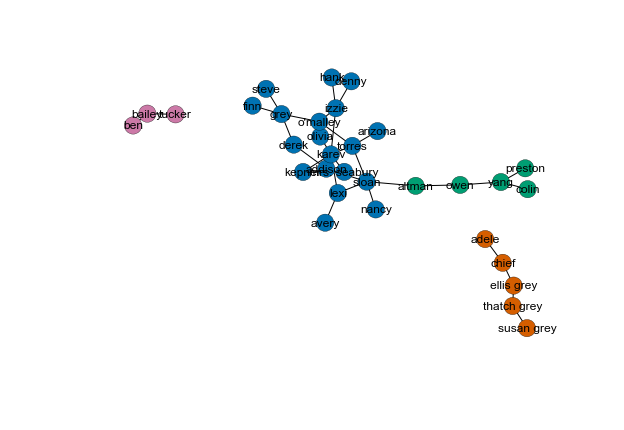

In [55]:
nx.draw(GA, node_color=node_colors, with_labels=True)

In [56]:
second_comm = tuple(sorted(c) for c in next(gn_comm))

community_map_2 = map_communities(GA, second_comm)

nx.set_node_attributes(GA, 'community two', community_map_2)

node_colors, color_map, palette = create_color_map(GA, 'community two')

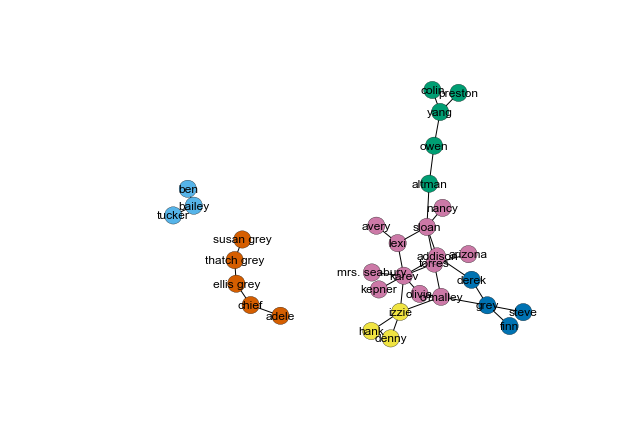

In [57]:
nx.draw(GA, node_color=node_colors, with_labels=True)

## K-Clique Communities

> a __clique__ is a subset of vertices of an undirected graph such that its induced subgraph is complete; that is, every two distinct vertices in the clique are adjacent. 

> A __k-clique community__ is the union of all cliques of size k that can be reached through adjacent (sharing k-1 nodes) k-cliques.


In [180]:
k_clique = (k_clique_communities(GA, 2))

In [181]:
dict(enumerate(k_clique))

{0: frozenset({'addison',
            'altman',
            'arizona',
            'avery',
            'colin',
            'denny',
            'derek',
            'finn',
            'grey',
            'hank',
            'izzie',
            'karev',
            'kepner',
            'lexi',
            'mrs. seabury',
            'nancy',
            "o'malley",
            'olivia',
            'owen',
            'preston',
            'sloan',
            'steve',
            'torres',
            'yang'}),
 1: frozenset({'bailey', 'ben', 'tucker'}),
 2: frozenset({'adele', 'chief', 'ellis grey', 'susan grey', 'thatch grey'})}

In [182]:
k_clique = (k_clique_communities(GA, 3))
dict(enumerate(k_clique))

{}

In [183]:
print("Percent of ALL edges that could exist: %0.3f" % nx.density(GA))

Percent of ALL edges that could exist: 0.069


# Karate time
!["kicking butt"](http://andover-karate-club.co.uk/wp-content/uploads/2014/02/karateleader.png)

In [132]:
Karate = nx.karate_club_graph()

In [133]:
gn_comm = girvan_newman(Karate)

first_comm = tuple(sorted(c) for c in next(gn_comm))

community_map = map_communities(Karate, first_comm)

nx.set_node_attributes(Karate, 'community gn', community_map)

node_colors, color_map, palette = create_color_map(Karate, 'community gn')

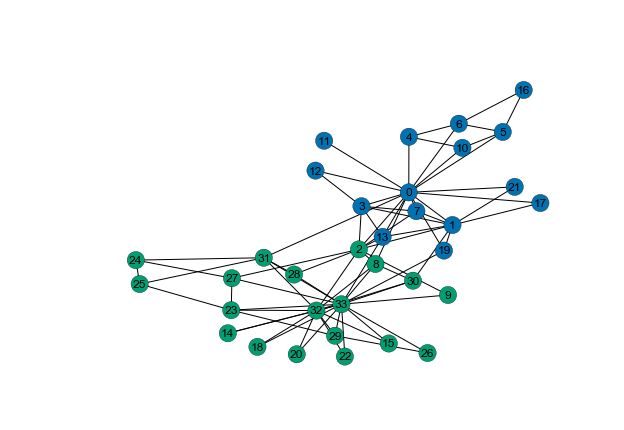

In [134]:
nx.draw(Karate, node_color=node_colors, with_labels=True)

In [135]:
k_clique = k_clique_communities(Karate, 3)

k_clique_comm = [list(community) for community in k_clique]

community_map = map_communities(Karate, k_clique_comm)

nx.set_node_attributes(Karate, 'community k-clique', community_map)

node_colors, color_map, palette = create_color_map(Karate, 'community k-clique')

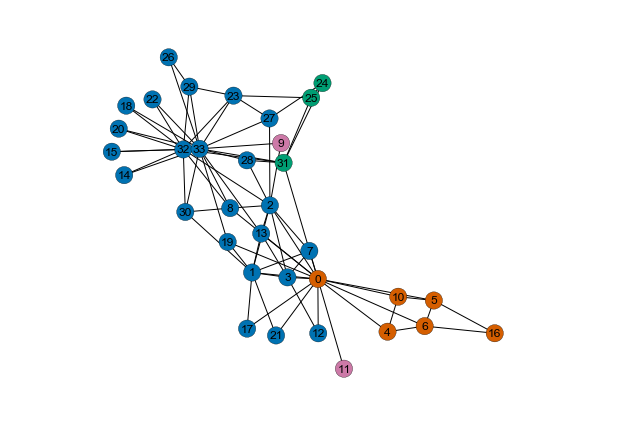

In [136]:
nx.draw(Karate, node_color=node_colors, with_labels=True)

## Validation

In [145]:
import pandas as pd

In [146]:
club_community = [(Karate.node[node]['club'],
                      Karate.node[node]['community gn'],
                      Karate.node[node]['community k-clique'])
                     for node in Karate.nodes()]

club_df = pd.DataFrame(club_community, columns=['club', 'community gn', 'community k-clique'])

In [147]:
pd.crosstab(club_df['club'], club_df['community gn'])

community gn,0,1
club,,
Mr. Hi,15,2
Officer,0,17


In [148]:
pd.crosstab(club_df['club'], club_df['community k-clique'])

community k-clique,0.0,1.0,2.0
club,,,
Mr. Hi,10,0,6
Officer,13,3,0


## More Algorithms
- [Louvain Method](http://perso.crans.org/aynaud/communities/)
- [Label Propogation](http://networkx.readthedocs.io/en/latest/reference/generated/networkx.algorithms.community.asyn_lpa.asyn_lpa_communities.html)